In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sales_df = pd.read_csv("../../data/intermediate_data/retail_sales_city_product.csv")
print(sales_df.head())

         Date City_ID   SKU_ID     Channel  Units_Sold    Sales  \
0  2023-01-01   CT001  SKU1002  Q Commerce         268     80.4   
1  2023-01-01   CT001  SKU1004  Q Commerce         168     50.4   
2  2023-01-01   CT001  SKU1001  E Commerce         521    156.3   
3  2023-01-01   CT001  SKU1002  E Commerce         247     74.1   
4  2023-01-01   CT001  SKU1007  E Commerce         161  12075.0   

                              Product Name Flavor Variant Launch Date  \
0            Minute Maid Mixed Fruit Juice    Mixed Fruit  2015-04-23   
1                 Minute Maid Pulpy Orange         Orange  2015-04-23   
2  Minute Maid Apple Juice - Honey Infused          Apple  2022-02-19   
3            Minute Maid Mixed Fruit Juice    Mixed Fruit  2015-04-23   
4           Minute Maid 250ml Pulpy Orange         Orange  2015-04-23   

   Pack Size (L)  General Trade  E Commerce  Modern Trade  HoReCa  Q Commerce  \
0           1.00              1           1             1       1           1

In [3]:
print(sales_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334300 entries, 0 to 334299
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Date                            334300 non-null  object 
 1   City_ID                         334300 non-null  object 
 2   SKU_ID                          334300 non-null  object 
 3   Channel                         334300 non-null  object 
 4   Units_Sold                      334300 non-null  int64  
 5   Sales                           334300 non-null  float64
 6   Product Name                    334300 non-null  object 
 7   Flavor Variant                  334300 non-null  object 
 8   Launch Date                     334300 non-null  object 
 9   Pack Size (L)                   334300 non-null  float64
 10  General Trade                   334300 non-null  int64  
 11  E Commerce                      334300 non-null  int64  
 12  Modern Trade    

In [4]:
# Display basic statistics
print(sales_df.describe())

          Units_Sold          Sales  Pack Size (L)  General Trade  \
count  334300.000000  334300.000000  334300.000000       334300.0   
mean      466.031756    8727.137150       0.699772            1.0   
std       651.847359   18257.794536       0.373343            0.0   
min         3.000000       1.200000       0.135000            1.0   
25%       114.000000      71.700000       0.250000            1.0   
50%       261.000000     258.900000       1.000000            1.0   
75%       553.000000    9375.000000       1.000000            1.0   
max     10317.000000  292500.000000       1.000000            1.0   

          E Commerce   Modern Trade         HoReCa     Q Commerce  \
count  334300.000000  334300.000000  334300.000000  334300.000000   
mean        0.874663       0.868800       0.787197       0.437332   
std         0.331101       0.337619       0.409290       0.496058   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.0000

In [5]:
sales_df.columns

Index(['Date', 'City_ID', 'SKU_ID', 'Channel', 'Units_Sold', 'Sales',
       'Product Name', 'Flavor Variant', 'Launch Date', 'Pack Size (L)',
       'General Trade', 'E Commerce', 'Modern Trade', 'HoReCa', 'Q Commerce',
       'City_Name', 'City_tier', 'Population_Density(persons/km)',
       'Per_Capita_Income (INR)'],
      dtype='object')

In [6]:
sales_df["Date"] = pd.to_datetime(sales_df["Date"], format="%Y-%m-%d")
sales_df["City_ID"] = sales_df["City_ID"].astype("category")
sales_df["SKU_ID"] = sales_df["SKU_ID"].astype("category")
sales_df["Flavor Variant"] = sales_df["Flavor Variant"].astype("category")
sales_df["Product Name"] = sales_df["Product Name"].astype("category")

# Extract month and year from the Date column
sales_df['YearMonth'] = sales_df['Date'].dt.to_period('M')

### Sales vs Channel
1. General Trade channel is the highest earning channel, while Q trade is the least.
2. Seasonal Trends: There are noticeable peaks in certain months (e.g., May 2023, April 2024, and June 2024), indicating possible seasonality or promotional events during those periods.

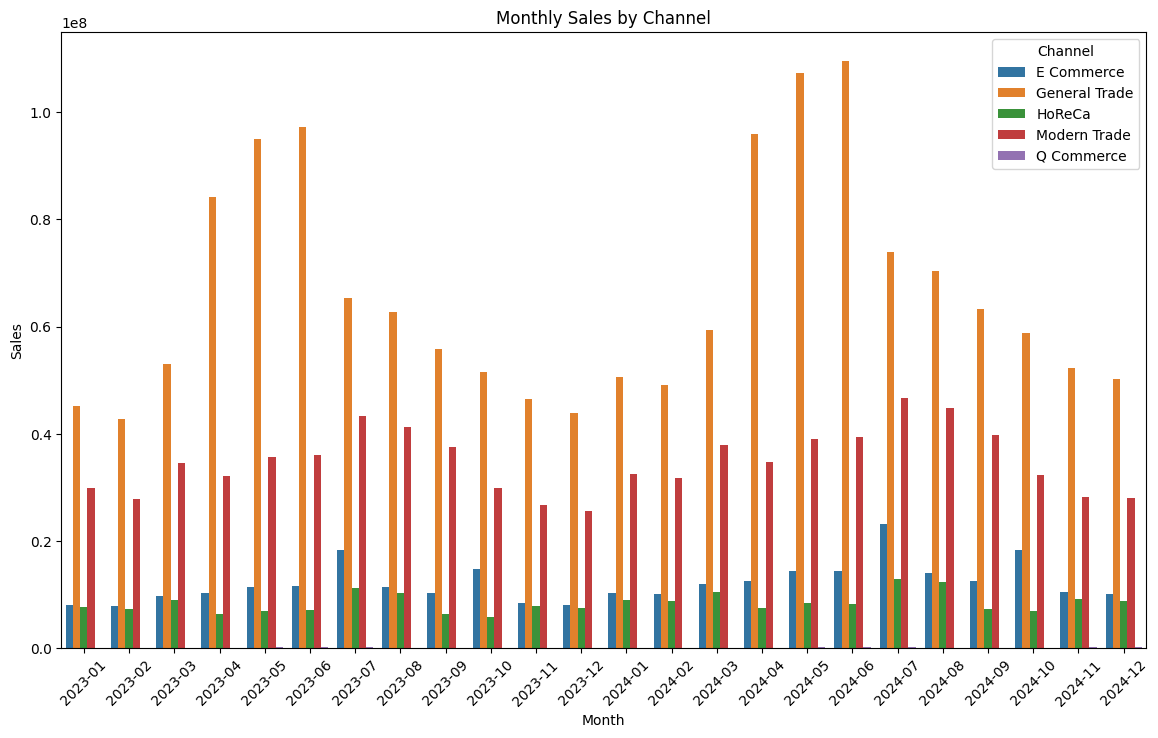

In [7]:
# Group by YearMonth and Channel, then sum the Sales
monthly_sales = sales_df.groupby(['YearMonth', 'Channel'])['Sales'].sum().reset_index()

# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(x='YearMonth', y='Sales', hue='Channel', data=monthly_sales)
plt.title('Monthly Sales by Channel')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Channel')
plt.show()

### Sales vs City
1. All the city follows a specific trend, showing a seasonality trend. More sales during summare season. <br>
a. Sales peak around April to June and May to July. <br>
b. Sales decline from August to December, showing a seasonal dip.
2. Last 7 cities(Jammu, Patna, Kolkata, Bhopal, Jaipur, Ludhiana, Lucknow) show low market penetration with less sales or demand.

In [8]:
# Group by YearMonth and City_Name, then sum the Sales
monthly_city_sales = sales_df.groupby(['YearMonth', 'City_Name'])['Sales'].sum().reset_index()

monthly_city_sales.groupby(["City_Name"])["Sales"].sum().sort_values(ascending=False)

City_Name
Chennai          272704635.6
Guwahati         226434927.9
Visakhapatnam    225501596.4
Delhi            214934489.4
Hyderabad        186277445.7
Mumbai           185872773.0
Surat            181329931.5
Kochi            173855107.5
Bengaluru        163286758.8
Chandigarh       162460351.8
Pune             156660066.0
Ahmedabad        141619979.1
Nagpur           138452103.9
Jammu             86817951.9
Patna             80945474.4
Kolkata           79468638.0
Bhopal            68483169.6
Jaipur            65866726.2
Ludhiana          57615277.5
Lucknow           48894545.1
Name: Sales, dtype: float64

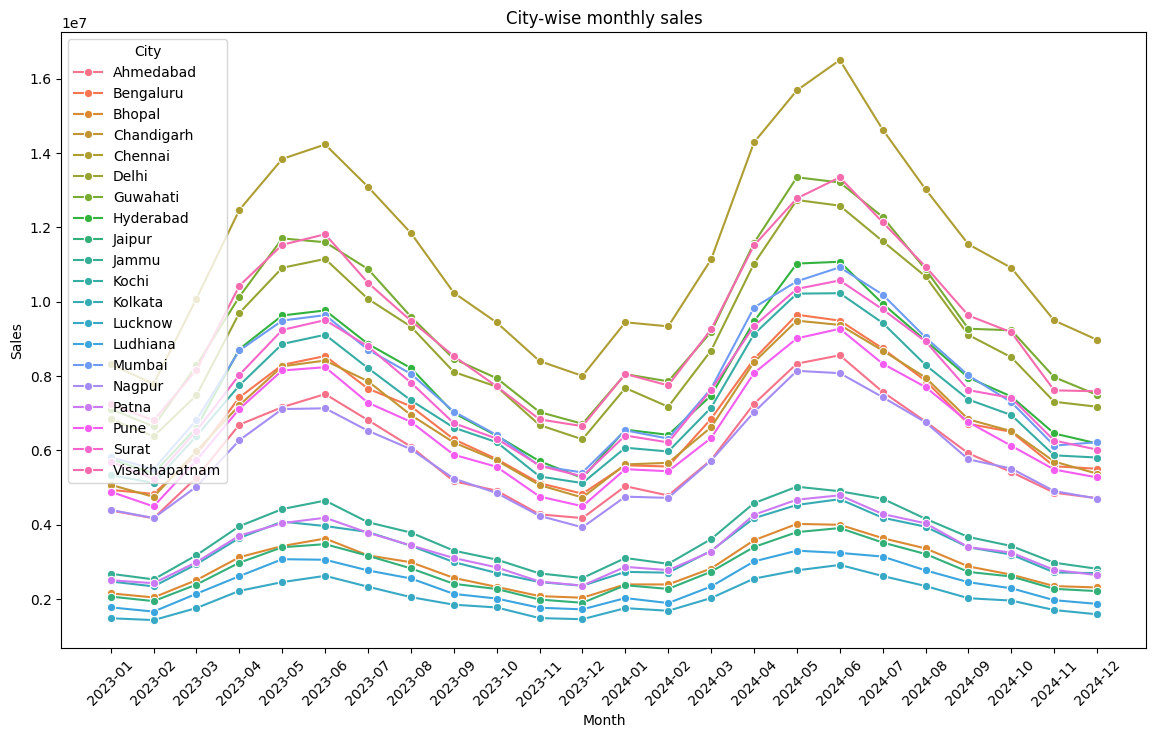

In [9]:
# Identify the top 10 cities by total sales
# top_cities = monthly_city_sales.groupby('City_Name')['Sales'].sum().nlargest(10).index

top_cities = monthly_city_sales.groupby('City_Name')['Sales'].sum().index

# Filter the data to include only the top 10 cities
top_city_sales = monthly_city_sales[monthly_city_sales['City_Name'].isin(top_cities)]

# Plot the line chart
plt.figure(figsize=(14, 8))
sns.lineplot(x=top_city_sales['YearMonth'].astype("str"), y='Sales', hue='City_Name', data=top_city_sales, marker='o')
plt.title('City-wise monthly sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='City')
plt.show()

### Sales vs Product
1. Our top selling product is "Minute Maid 250ml Pulpy Orange".
2. Summer spike pattern is visible, with sales rising between April to June and then gradually tapering off towards year-end.

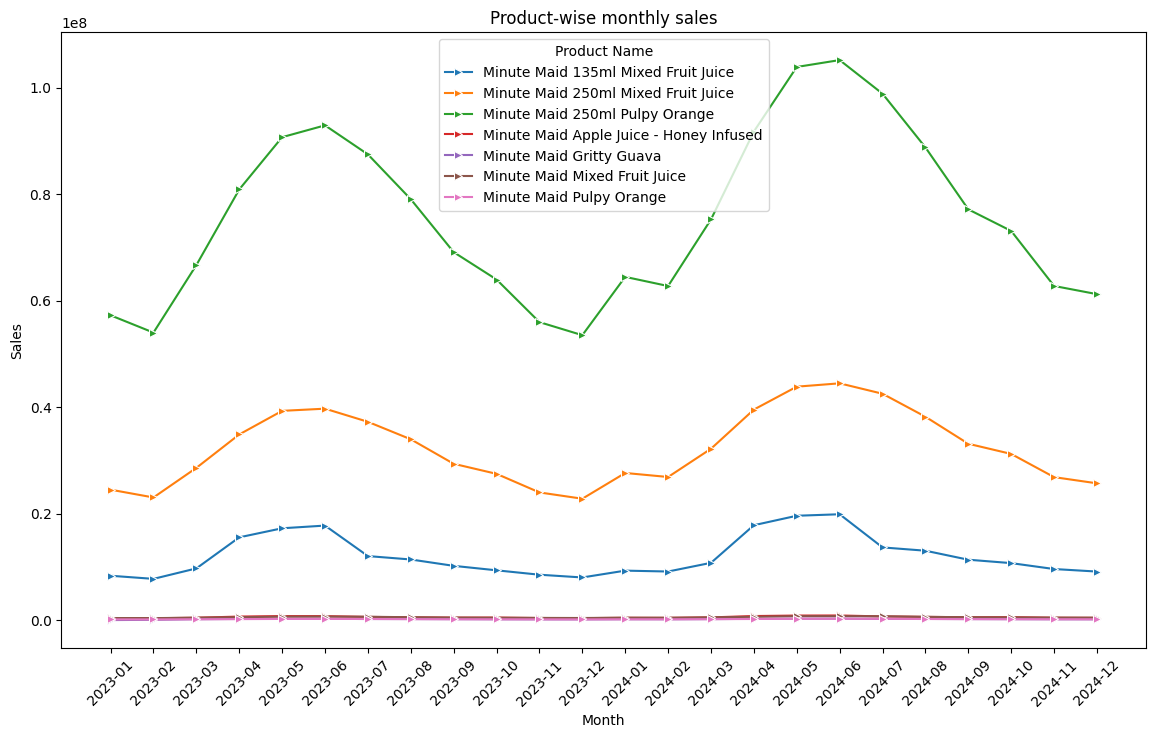

In [10]:
# Group by YearMonth and Product Name, then sum the Sales
monthly_product_sales = sales_df.groupby(['YearMonth', 'Product Name'])['Sales'].sum().reset_index()

# Plot the line chart
plt.figure(figsize=(14, 8))
sns.lineplot(x=monthly_product_sales['YearMonth'].astype("str"), y='Sales', hue='Product Name', data=monthly_product_sales, marker='>')
plt.title('Product-wise monthly sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Product Name')
plt.show()

### Flavor vs Sales
Orange flavor is leading the market, proving that "Pulpy Orange" is highest selling product.

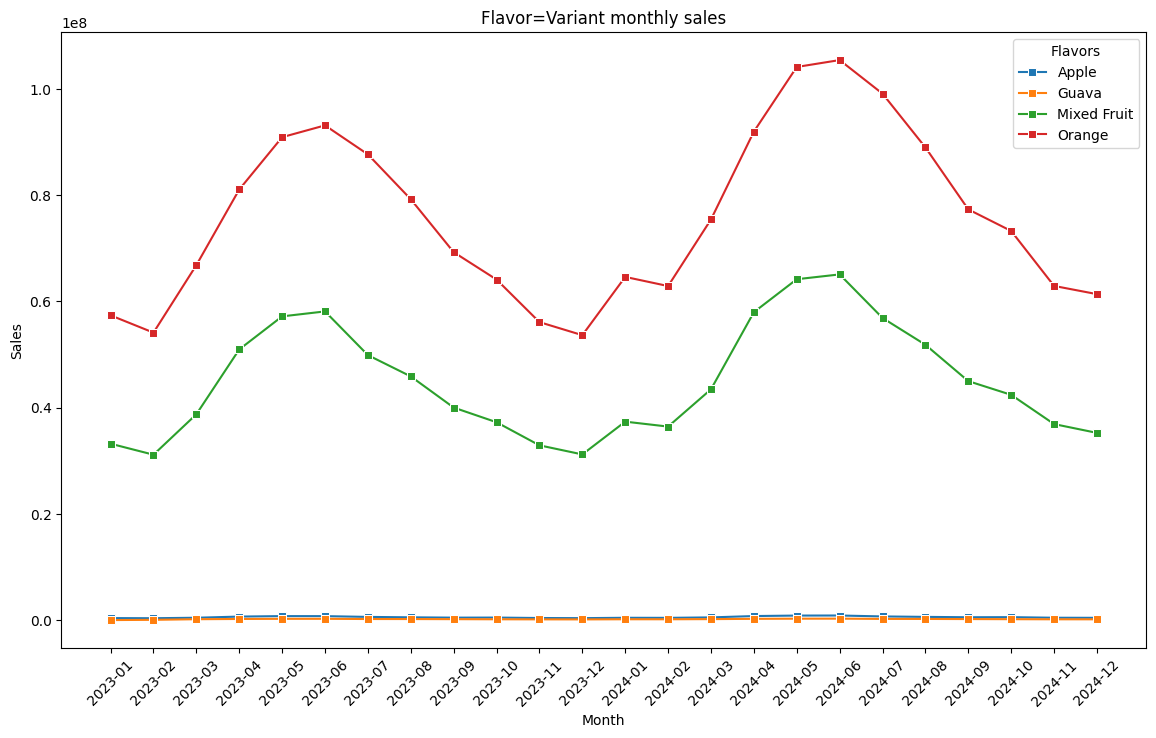

In [11]:
# Group by YearMonth and Flavor Variant, then sum the Sales
monthly_flavour_sales = sales_df.groupby(['YearMonth', 'Flavor Variant'])['Sales'].sum().reset_index()

# Plot the line chart
plt.figure(figsize=(14, 8))
sns.lineplot(x=monthly_flavour_sales['YearMonth'].astype("str"), y='Sales', hue='Flavor Variant', data=monthly_flavour_sales, marker='s')
plt.title('Flavor=Variant monthly sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Flavors')
plt.show()

### Comparative Chart between Per Capita Income and Total Sales by City
1. Cities with more per capita income show relatively higher total sales, indicating a potential correlation between wealthier populations and spending power.
2. Nagpur and Ahmedabad have relatively decent per capita income but show a notable drop in total sales, which could indicate untapped market potential.

In [12]:
per_capita_city_sales = sales_df.groupby("City_Name")["Per_Capita_Income (INR)"].sum().sort_values(ascending=False)
city_sales = sales_df.groupby("City_Name")["Sales"].sum().sort_values(ascending=False)

/tmp/ipykernel_84189/1812602273.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(comparison_df['City_Name'], rotation=45, ha='right')


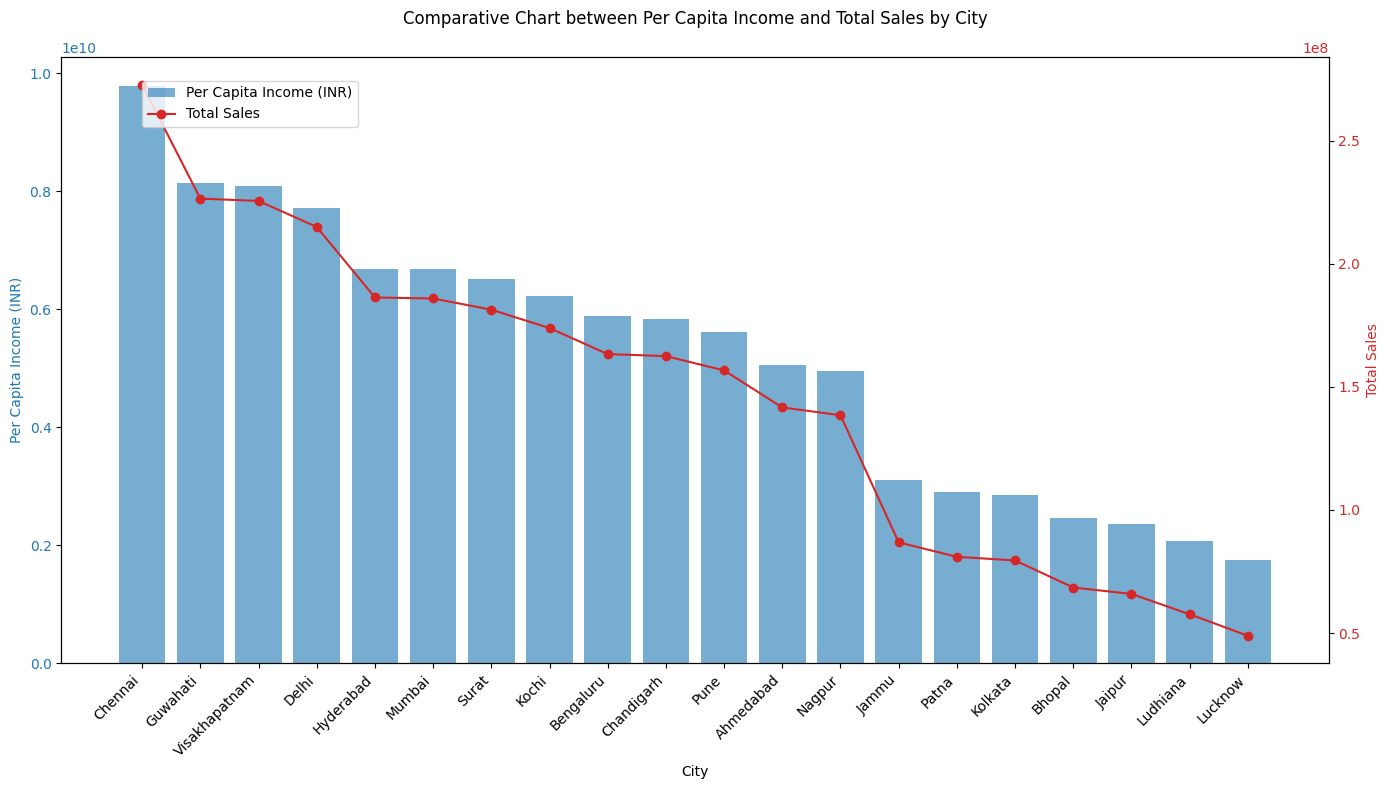

In [13]:
# Create a new DataFrame for comparison
comparison_df = pd.DataFrame({
    'City_Name': per_capita_city_sales.index,
    'Per_Capita_Income (INR)': per_capita_city_sales.values,
    'Total Sales': city_sales.values
})

# Plot the comparative chart
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot per capita income
ax1.set_xlabel('City')
ax1.set_ylabel('Per Capita Income (INR)', color='tab:blue')
ax1.bar(comparison_df['City_Name'], comparison_df['Per_Capita_Income (INR)'], color='tab:blue', alpha=0.6, label='Per Capita Income (INR)')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticklabels(comparison_df['City_Name'], rotation=45, ha='right')

# Create a second y-axis to plot total sales
ax2 = ax1.twinx()
ax2.set_ylabel('Total Sales', color='tab:red')
ax2.plot(comparison_df['City_Name'], comparison_df['Total Sales'], color='tab:red', marker='o', label='Total Sales')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add title and legend
fig.suptitle('Comparative Chart between Per Capita Income and Total Sales by City')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

plt.show()

### Packaging size vs Sales
1. 250ml packagin size is leading the market.
2. Seasonal Peaks: Both 0.25 L and 0.135 L packs experience strong sales surges in mid-year months (likely summer-driven demand).

In [14]:
sales_df.groupby(["Pack Size (L)"])["Sales"].sum().sort_values(ascending=False)

Pack Size (L)
0.250    2.593630e+09
0.135    2.896336e+08
1.000    3.421837e+07
Name: Sales, dtype: float64

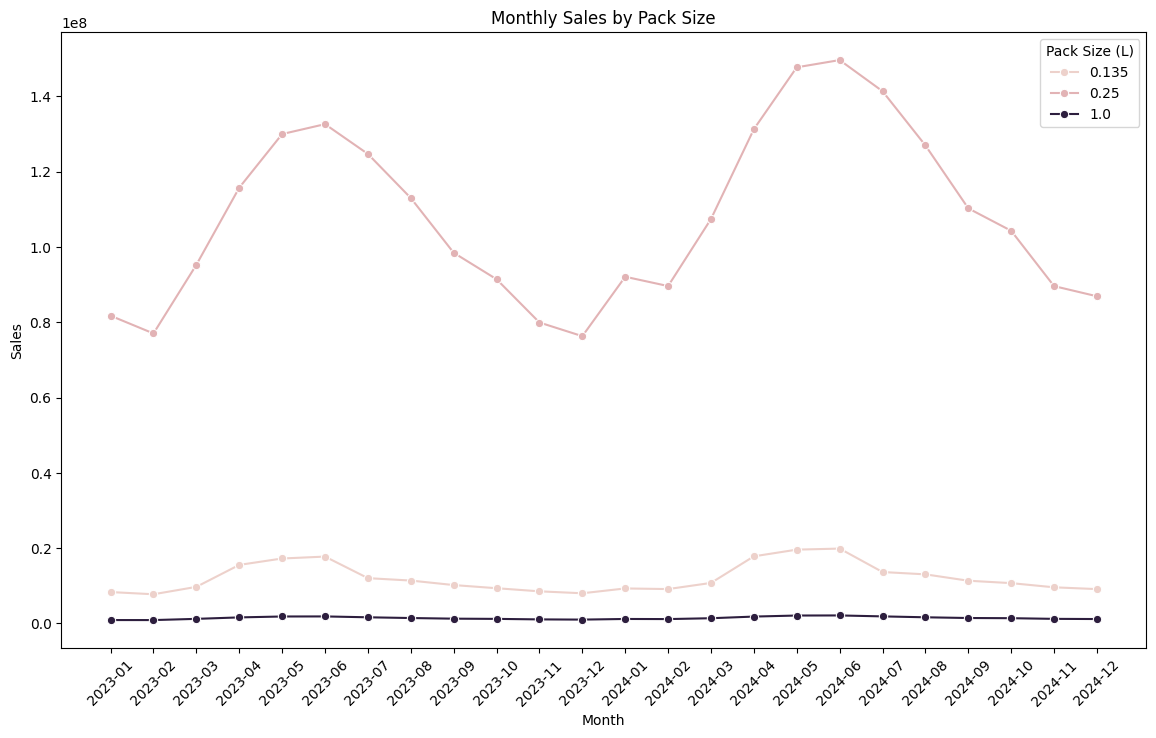

In [15]:
# Group by YearMonth and Pack Size (L), then sum the Sales
monthly_pack_size_sales = sales_df.groupby(['YearMonth', 'Pack Size (L)'])['Sales'].sum().reset_index()

# Plot the data
plt.figure(figsize=(14, 8))
sns.lineplot(x=monthly_pack_size_sales['YearMonth'].astype("str"), y='Sales', hue='Pack Size (L)', data=monthly_pack_size_sales, marker='o')
plt.title('Monthly Sales by Pack Size')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend(title='Pack Size (L)')
plt.show()

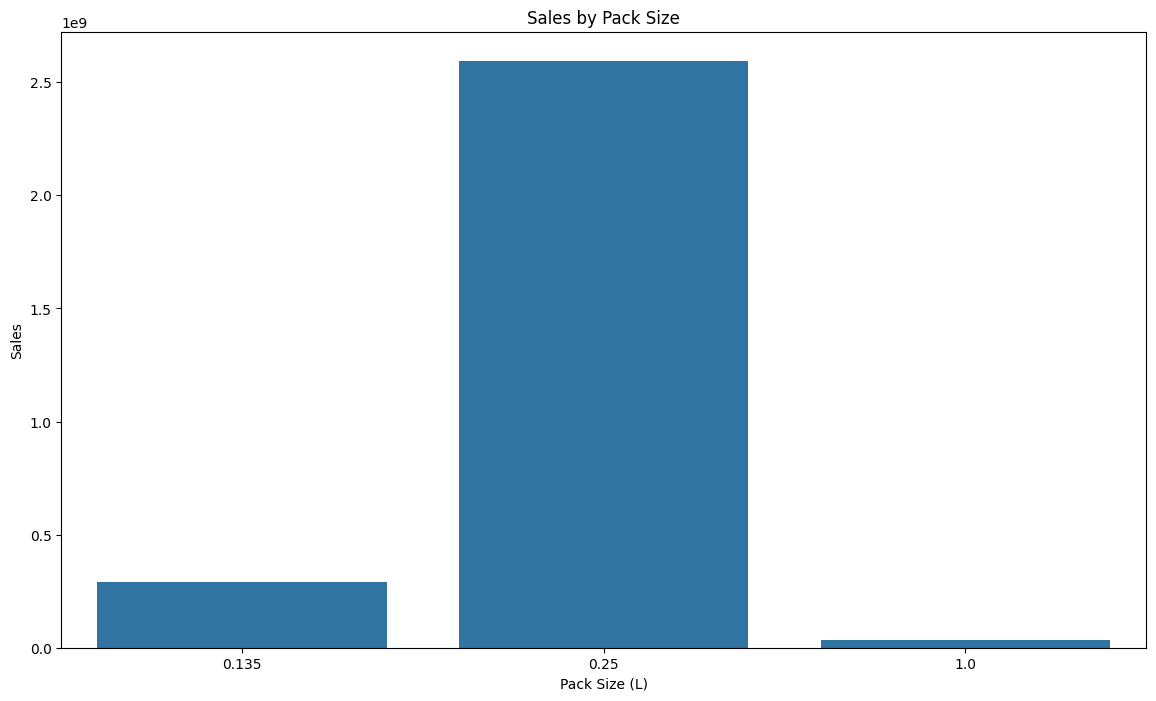

In [16]:
# Group by Pack Size (L) and sum the Sales
pack_size_sales = sales_df.groupby('Pack Size (L)')['Sales'].sum().reset_index()

# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(x='Pack Size (L)', y='Sales', data=pack_size_sales)
plt.title('Sales by Pack Size')
plt.xlabel('Pack Size (L)')
plt.ylabel('Sales')
plt.show()

### City_tier-wise Sales distribution
Interestingly, tier 2 cities show more sales compared to tier 1 cities.

In [17]:
sales_df["City_tier"].unique()

array(['Tier 1', 'Tier 2'], dtype=object)

In [18]:
sales_df.groupby(["City_tier", "Product Name"])["Sales"].sum().sort_values(ascending=False)

City_tier  Product Name                           
Tier 2     Minute Maid 250ml Pulpy Orange             944278500.0
Tier 1     Minute Maid 250ml Pulpy Orange             872450175.0
Tier 2     Minute Maid 250ml Mixed Fruit Juice        403906725.0
Tier 1     Minute Maid 250ml Mixed Fruit Juice        372994575.0
Tier 2     Minute Maid 135ml Mixed Fruit Juice        150694303.5
Tier 1     Minute Maid 135ml Mixed Fruit Juice        138939300.0
Tier 2     Minute Maid Apple Juice - Honey Infused      6827910.0
           Minute Maid Mixed Fruit Juice                6576736.8
Tier 1     Minute Maid Apple Juice - Honey Infused      6323653.8
           Minute Maid Mixed Fruit Juice                6079454.7
Tier 2     Minute Maid Pulpy Orange                     2192339.4
           Minute Maid Gritty Guava                     2180649.0
Tier 1     Minute Maid Pulpy Orange                     2023938.9
           Minute Maid Gritty Guava                     2013688.2
Name: Sales, dtype: float

In [19]:
sales_df.groupby(["City_tier", "Channel"])["Sales"].sum().sort_values(ascending=False)

City_tier  Channel      
Tier 2     General Trade    823161437.1
Tier 1     General Trade    761458187.1
Tier 2     Modern Trade     434639269.8
Tier 1     Modern Trade     400665651.6
Tier 2     E Commerce       151917931.5
Tier 1     E Commerce       140372466.0
Tier 2     HoReCa           105710895.0
Tier 1     HoReCa            97194839.4
Tier 2     Q Commerce         1227630.3
Tier 1     Q Commerce         1133641.5
Name: Sales, dtype: float64

### Population density across cities vs Sales
Kolkata showing highest population density, have lowest sales, leading to market space that can be captured.

In [20]:
# Group by City_Name and sum the Population_Density and Sales
city_density_sales = sales_df.groupby('City_Name')[['Population_Density(persons/km)', 'Sales']].sum().sort_values(by="Population_Density(persons/km)", ascending=False).reset_index()
city_density_sales

,City_Name,Population_Density(persons/km),Sales
0,Kolkata,405372180,79468638.0
1,Mumbai,342958370,185872773.0
2,Delhi,248936495,214934489.4
3,Chennai,241632040,272704635.6
4,Ahmedabad,217027560,141619979.1
5,Hyderabad,175123055,186277445.7
6,Ludhiana,162971250,57615277.5
7,Nagpur,161533760,138452103.9
8,Chandigarh,154613750,162460351.8
9,Surat,144033155,181329931.5


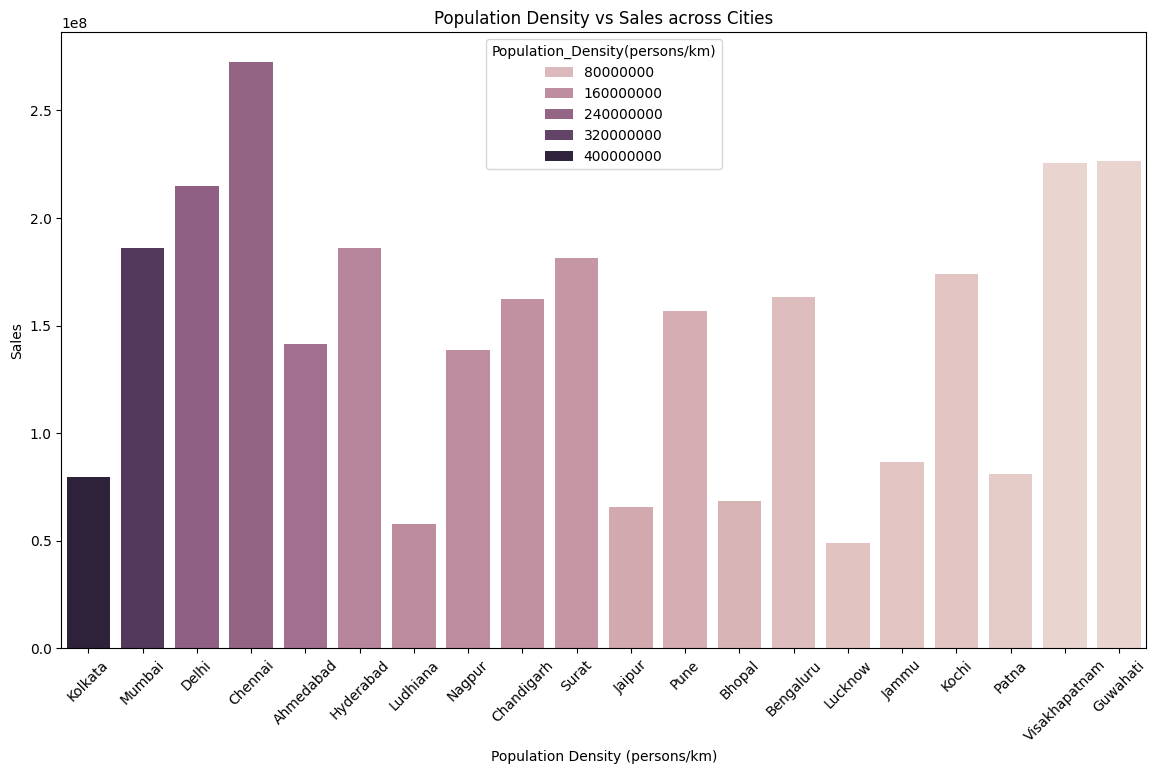

In [21]:
# Plot the data
plt.figure(figsize=(14, 8))
sns.barplot(x='City_Name', y='Sales', hue="Population_Density(persons/km)",data=city_density_sales)
plt.title('Population Density vs Sales across Cities')
plt.xlabel('Population Density (persons/km)')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()